In [1]:
%load_ext autoreload
%autoreload 2
import sys
dirr = "../../src"
if dirr not in sys.path:
    sys.path.append(dirr)
import pandas as pd
import numpy as np
import numpy.random as npr
from utils import prepend_ones_col
import matplotlib.pyplot as plt

from IPython.display import HTML
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

# Q1
[Link](https://drive.google.com/open?id=14LtcG0TheEuIQeAGzeIpiOQZjeZXIeSg) to the pen paper solutions.

---

# Q2
Custom functions for differnt ways to calculate theta.

In [2]:
# reading data
data_loc = "../../data/real_estate/dataset.xlsx"
data = pd.read_excel(data_loc)

# Normalizing the data
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

# breaking data
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]
tupl = train_test_split(X.values, y.values, test_size = .3)
X_train, X_test, y_train, y_test = tupl
X_train[:3, :]

/home/apoorv/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.45454541, 0.36757991, 0.04113795, 0.5       , 0.60542899,
        0.75425922],
       [0.27272729, 0.2260274 , 0.03956753, 0.7       , 0.52363063,
        0.77507009],
       [0.90909094, 0.60273973, 0.04828491, 0.6       , 0.57598158,
        0.73183093]])

In [3]:
from lregress import normalEquationRidgeRegression
theta = normalEquationRidgeRegression(X_train, y_train, lmbd=0.1)
print ("normalEquationRidgeRegression:\n", theta)

from lregress import coodrdinateDescentRegression
theta, _ = coodrdinateDescentRegression(X_train, y_train, it=200)
print ("coodrdinateDescentRegression:\n", theta)

from lregress import sgdRegression
theta, _ = sgdRegression(X_train, y_train, alpha = 0.003, it=300)
print ("sgdRegression:\n", theta)

from lregress import coodrdinateDescentLasso
theta = coodrdinateDescentLasso(X_train, y_train, lmbd=.2, it=200)
print ("coodrdinateDescentLasso:\n", theta)

from lregress import gradientDescentAutogradLasso
theta = gradientDescentAutogradLasso(X_train, y_train, alpha=0.003, lmbd=1, it=20)
print ("gradientDescentAutogradLasso:\n", theta)

normalEquationRidgeRegression:
 [ 2.12980045e-01  4.79960938e-02 -9.71154881e-02 -2.36154741e-01
  1.29076536e-01  1.39192638e-01 -2.29021716e-04]
coodrdinateDescentRegression:
 [ 0.21708908  0.04815628 -0.09726612 -0.24019848  0.12865747  0.13827129
 -0.0045823 ]
sgdRegression:
 [ 0.19408888  0.04883505 -0.09528042 -0.2167475   0.13380602  0.14533582
  0.01876485]
coodrdinateDescentLasso:
 [ 0.21110589  0.04745523 -0.09571718 -0.23310203  0.12956083  0.13863088
  0.00139241]
gradientDescentAutogradLasso:
 [1.92209759e+09 1.00133180e+09 8.23799801e+08 2.96536347e+08
 8.34662909e+08 8.73025458e+08 1.26518789e+09]


We were **not** able to get a correct solution in the case of Autograd with lasso regression.

---

# Q4


In [6]:
# data
X = [[1, 2],
     [2, 4],
     [3, 6],
     [4, 8]]
y = [2, 3, 4, 5]
X = np.array(X)
y = np.array(y)

### a)

In [7]:
lr = Ridge(alpha=0.1)
lr.fit(X ,y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [8]:
print('theta0',lr.intercept_)
print('theta', lr.coef_)

theta0 1.0099601593625498
theta [0.19920319 0.39840637]


### b)

In [9]:
normalEquationRidgeRegression(X, y, lmbd=1)

array([0.44705882, 0.23529412, 0.47058824])

Yes, I am able to learn the theta, see above for the coefficients.

---

# Q5
Using sklearn's RIDGE and LASSO modules after normalizing the data.

In [58]:
# reading data
data_loc = "../../data/real_estate/dataset.xlsx"
data = pd.read_excel(data_loc)

# Normalizing the data
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

/home/apoorv/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


**a)** Ridge Regression

In [11]:
def cross(dTrain, depths, num_valid, clf):
    folds = make_folds(dTrain, num_valid)
    passed_folds = folds[:-1] # holding out test
    k, acc= best_k(passed_folds, depths, clf)
    acc = 0
    curr_fold_train = folds[:-1]
    curr_fold_train = pd.concat(curr_fold_train)
    curr_fold_test = folds[-1]
    linear_reg = clf(alpha=k)
    linear_reg.fit(curr_fold_train.iloc[:, :-1], curr_fold_train.iloc[:, -1])
    my_preds = linear_reg.predict(curr_fold_test.iloc[:, :-1])
    true = curr_fold_test.iloc[:, -1].values
    my_acc = mean_squared_error(true, my_preds)
    return {"Lambda": k, "TEST mse": my_acc}   

def make_folds(dTrain, num_valid):
    '''Make a number of folds with diven pd'''
    train = shuffle(dTrain)
    last = train.shape[0]
    folds = []
    for i in range(num_valid):
        start = i*int(last/num_valid)
        end = (i+1)*int(last/num_valid)
        if end >= last:
            end = -1
        folds.append(train.iloc[start:end, :])
    return folds

def best_k(folds, depths, clf):
    '''return lambda that maximizes the avg accuracy'''
    num_valid = len(folds)
    acc = {}
    train_acc = {}
    for i in range(num_valid):
        curr_fold_train = [x for j,x in enumerate(folds) if j!=i] 
        curr_fold_validation = folds[i]
        curr_fold_train = pd.concat(curr_fold_train)
        for k in depths:
            linear_reg = clf(alpha=k)
            linear_reg.fit(curr_fold_train.iloc[:, :-1], curr_fold_train.iloc[:, -1])
            my_preds = linear_reg.predict(curr_fold_validation.iloc[:, :-1])
            true = curr_fold_validation.iloc[:, -1].values
            my_acc = mean_squared_error(true, my_preds)
            acc[k] = my_acc
            
            my_preds = linear_reg.predict(curr_fold_train.iloc[:, :-1])
            true = curr_fold_train.iloc[:, -1].values
            train_acc = mean_squared_error(true, my_preds)
            
            print(k, "| validation mse: %8.2f"% my_acc) # for showcasing
            print(k, "| train mse: %8.2f"% train_acc) # for showcasing
    acc = {k: acc[k] for k in acc.keys()}
    
    x = acc
    sorted_by_value = sorted(x.items(), key=lambda kv: kv[1])
    return sorted(x[0] for x in sorted_by_value if sorted_by_value[0][1] == x[1])[0], acc

In [202]:
k = cross(data, [0.0, 0.8, 2, 10, 50, 100], 5, Ridge)
print (k)

0.0 | validation mse:     0.00
0.0 | train mse:     0.01
0.8 | validation mse:     0.00
0.8 | train mse:     0.01
2 | validation mse:     0.00
2 | train mse:     0.01
10 | validation mse:     0.01
10 | train mse:     0.01
50 | validation mse:     0.01
50 | train mse:     0.01
100 | validation mse:     0.01
100 | train mse:     0.01
0.0 | validation mse:     0.01
0.0 | train mse:     0.01
0.8 | validation mse:     0.01
0.8 | train mse:     0.01
2 | validation mse:     0.01
2 | train mse:     0.01
10 | validation mse:     0.01
10 | train mse:     0.01
50 | validation mse:     0.01
50 | train mse:     0.01
100 | validation mse:     0.01
100 | train mse:     0.01
0.0 | validation mse:     0.01
0.0 | train mse:     0.01
0.8 | validation mse:     0.01
0.8 | train mse:     0.01
2 | validation mse:     0.01
2 | train mse:     0.01
10 | validation mse:     0.01
10 | train mse:     0.01
50 | validation mse:     0.01
50 | train mse:     0.01
100 | validation mse:     0.01
100 | train mse:     0.0

**b)** Lasso Regression

In [203]:
k = cross(data, [0.2, 0.8, 2, 10, 50, 100], 5, Lasso)
print (k)

0.2 | validation mse:     0.01
0.2 | train mse:     0.01
0.8 | validation mse:     0.01
0.8 | train mse:     0.01
2 | validation mse:     0.01
2 | train mse:     0.01
10 | validation mse:     0.01
10 | train mse:     0.01
50 | validation mse:     0.01
50 | train mse:     0.01
100 | validation mse:     0.01
100 | train mse:     0.01
0.2 | validation mse:     0.01
0.2 | train mse:     0.01
0.8 | validation mse:     0.01
0.8 | train mse:     0.01
2 | validation mse:     0.01
2 | train mse:     0.01
10 | validation mse:     0.01
10 | train mse:     0.01
50 | validation mse:     0.01
50 | train mse:     0.01
100 | validation mse:     0.01
100 | train mse:     0.01
0.2 | validation mse:     0.01
0.2 | train mse:     0.01
0.8 | validation mse:     0.01
0.8 | train mse:     0.01
2 | validation mse:     0.01
2 | train mse:     0.01
10 | validation mse:     0.01
10 | train mse:     0.01
50 | validation mse:     0.01
50 | train mse:     0.01
100 | validation mse:     0.01
100 | train mse:     0.0

---

# Q5

**c)** Making the Lasso and Regression paths

In [59]:
# reading data
data_loc = "../../data/real_estate/dataset.xlsx"
data = pd.read_excel(data_loc)

# Normalizing the data
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

# breaking data
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]
tupl = train_test_split(X.values, y.values, test_size = .3)
X_train, X_test, y_train, y_test = tupl
X_train[:3, :]

/home/apoorv/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.72727271, 0.16210046, 0.05509584, 1.        , 0.62239457,
        0.69107181],
       [0.45454541, 0.2716895 , 0.20677973, 0.1       , 0.24200194,
        0.80752642],
       [0.81818188, 0.27853881, 0.20677973, 0.1       , 0.24200194,
        0.80752642]])

In [89]:
ks = [1e-7, 1e-5 ,1e-3, 1e-1, 0.2, 0.4, 1.8, 2, 2.4,
      2.9, 3, 4, 9, 10, 13, 15, 24,
      34, 77, 88, 99, 120, 200, 300, 500,
      800, 1100, 1110, 2000, 3000, 50000]

rth = []
lth = []
for k in ks:
    lr = Ridge(alpha=k, fit_intercept=False)
    lr.fit(prepend_ones_col(X_train), y_train)
    rth.append(lr.coef_)

    lr = Lasso(alpha=k, fit_intercept=False)
    lr.fit(prepend_ones_col(X_train), y_train)
    lth.append(lr.coef_)

rth = np.array(rth)
lth = np.array(lth)

In [90]:
rth[:, 1] # one theta over lambdas

array([0.02281127, 0.02281127, 0.02281141, 0.02283244, 0.02286542,
       0.02295495, 0.02382141, 0.02394848, 0.02419864, 0.02450309,
       0.02456287, 0.02514174, 0.02766972, 0.02812246, 0.02939716,
       0.03018286, 0.03316981, 0.03563343, 0.04055765, 0.04102542,
       0.04132017, 0.04153929, 0.04036978, 0.03759456, 0.0321633 ,
       0.026057  , 0.02181085, 0.02169233, 0.0145887 , 0.01064962,
       0.00077574])

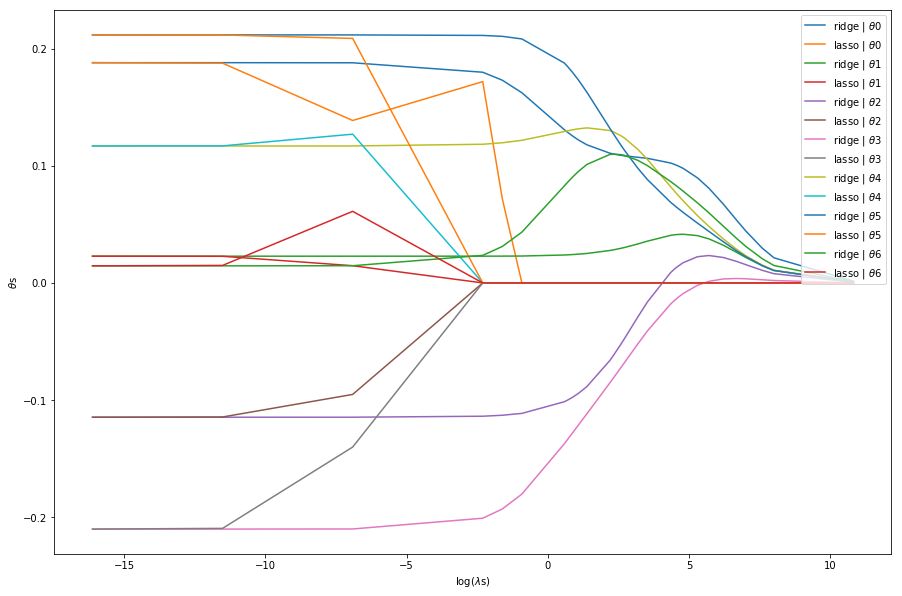

In [93]:
# make main subplot
fig, ax = plt.subplots(figsize=(15,10))
fig

for i in range(len(rth[0])):
    ridgeth = rth[:, i]
    lassoth = lth[:, i]
    ax.plot(np.log(ks), ridgeth, label=r'ridge | $\theta$' + str(i))
    ax.plot(np.log(ks), lassoth, label=r'lasso | $\theta$' + str(i))

ax.set_ylabel(r"$\theta$s")
ax.set_xlabel(r"log($\lambda$s)")

legend = ax.legend(loc='upper right')#, shadow=True, fontsize='x-large')

plt.show()

From the graphs we can say that L1 norm regularization results in much more sparcification of the weight matrix thatn the use of L2 Regularization. We can see above that weight vector becomes zero muh faster with the use of L1 regularization.

**b)** Getting the train and test rmse wrt $\lambda$ in Lasso and Ridge.

In [95]:
ks = [1e-7, 1e-5 ,1e-3, 1e-1, 0.2, 0.4, 1.8, 2, 2.4,
      2.9, 3, 4, 9, 10, 13, 15, 24,
      34, 77, 88, 99, 120, 200, 300, 500,
      800, 1100, 1110, 2000, 3000, 50000]

ridge_rmse_train = []
ridge_rmse_test = []
lasso_rmse_train = []
lasso_rmse_test = []
p_X_train = prepend_ones_col(X_train)
p_X_test = prepend_ones_col(X_test)
for k in ks:
    lr = Ridge(alpha=k, fit_intercept=False)
    lr.fit(p_X_train, y_train)
    y_pred = lr.predict(p_X_train)
    ridge_rmse_train.append(mean_squared_error(y_pred, y_train)**0.5)
    y_pred = lr.predict(p_X_test)
    ridge_rmse_test.append(mean_squared_error(y_pred, y_test)**0.5)

    lr = Lasso(alpha=k, fit_intercept=False)
    lr.fit(p_X_train, y_train)
    y_pred = lr.predict(p_X_train)
    lasso_rmse_train.append(mean_squared_error(y_pred, y_train)**0.5)
    y_pred = lr.predict(p_X_test)
    lasso_rmse_test.append(mean_squared_error(y_pred, y_test)**0.5)

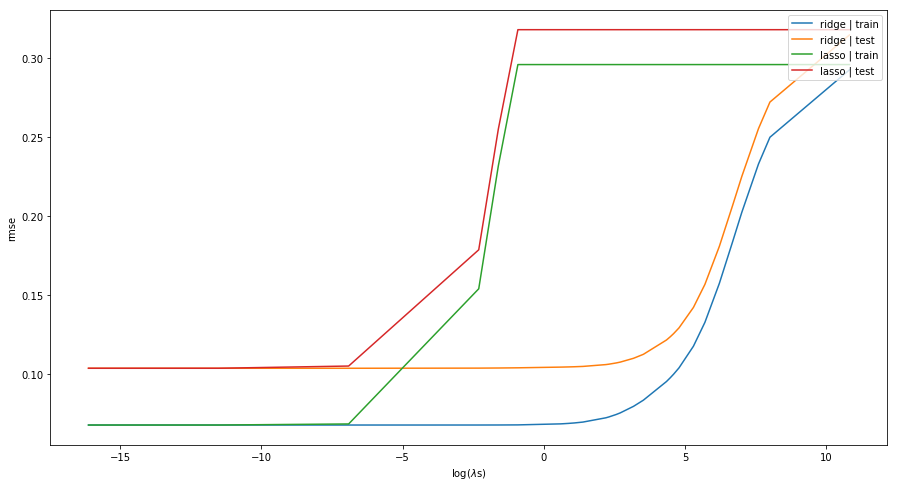

In [98]:
# make main subplot
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(np.log(ks), ridge_rmse_train, label='ridge | train')
ax.plot(np.log(ks), ridge_rmse_test, label='ridge | test')
ax.plot(np.log(ks), lasso_rmse_train, label='lasso | train')
ax.plot(np.log(ks), lasso_rmse_test, label='lasso | test')

ax.set_ylabel("rmse")
ax.set_xlabel(r"log($\lambda$s)")

legend = ax.legend(loc='upper right')#, shadow=True, fontsize='x-large')

plt.show()

Here, we expected a decrease in the validation rmse but since the data is not that noisy, the model wasn't overfitting. For Ridge or Lasso regularization methods to work we need to have a overfitted model. 

---

# Q3
**a)**

In [39]:
# data
X = [[1, 3, 6]]
y = [6, 10, 16]
X = np.array(X).T
y = np.array(y)

In [40]:
th_s, cal_ths_s = sgdRegression(X, y, alpha=0.01, it=10)
th_c, cal_ths_c = coodrdinateDescentRegression(X, y, it=10)

In [44]:
import matplotlib.animation as animation
from matplotlib.pyplot import rc
rc('animation', html='jshtml')
# plt.rcParams["animation.html"] = "html5"
# %matplotlib notebook

In [52]:
def predict(theta, X):
    X_new = prepend_ones_col(X)
    yhat = np.matmul(X_new, theta)
    return yhat

def cost(th0, th1, x, y):
    summ = 0
    for i in range(len(x)):
        summ += (y[i] - th0 - th1*x[i])**2
    return summ

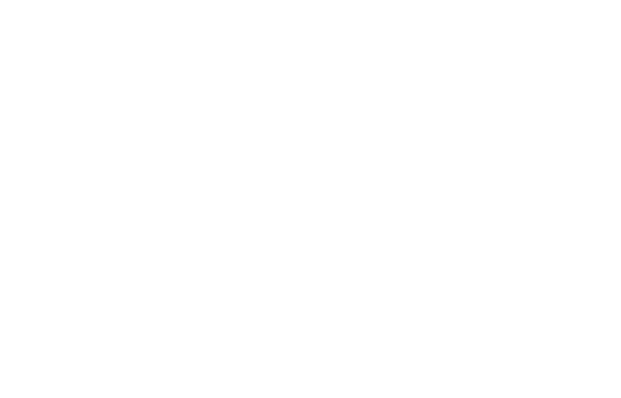

In [54]:
Theta = cal_ths_s
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
theta0_grid = np.linspace(-2, 6, 10)
theta1_grid = np.linspace(-2, 6, 10)
map_X, map_Y = np.meshgrid(theta0_grid, theta1_grid)
theta0_true = 4
theta1_true = 2

J_grid = cost(map_X, map_Y, X, y)
ax[0].scatter(X, y, marker='x', s=40, color='k')
contours = ax[1].contour(map_Y, map_X, J_grid, 30)
ax[1].clabel(contours)
ax[1].scatter([theta1_true]*2,[theta0_true]*2,s=[50,10], color=['k','w'])
ax[1].set_xlabel(r'$\theta_1$')
ax[1].set_ylabel(r'$\theta_0$')
ax[1].set_title('Cost Contour Plot')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
line, = ax[0].plot([], [], color='r', lw=2,label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*Theta[0]))
def animate(i):
    '''ax[0].plot(X, predict(Theta[i], X), color='r', lw=2,
               label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*Theta[i]))'''
    #ax[1].scatter(Theta[i][0], Theta[i][1], s=40, lw=0)
    yhat = (predict(Theta[i], X)).reshape((X.shape[0], -1))
    #print(X[:, 1].shape)
    line.set_data(X[:], yhat)
    ax[1].annotate('', xy=Theta[i], arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1})
    ax[0].plot(X, predict(Theta[i], X), color='r', lw=2,label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*Theta[i]))
    return ax

anim = animation.FuncAnimation(fig, animate, frames=len(cal_ths_c), init_func=None, interval=20, blit=True)
# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))
anim